In [1]:
# Online Bookstore Data Analytics
## Step 1: Data Loading and Understanding


In [2]:
import pandas as pd

books = pd.read_csv("../data/books.csv")
users = pd.read_csv("../data/users.csv")
orders = pd.read_csv("../data/orders.csv")
ratings = pd.read_csv("../data/ratings.csv")

books.head()


,book_id,title,author,genre,price,publish_year
0,1,The Alchemist,Paulo Coelho,Fiction,299,2005
1,2,Atomic Habits,James Clear,Self Help,399,2018
2,3,Python Basics,John Smith,Education,499,2020
3,4,Data Science 101,Andrew Lee,Education,599,2019
4,5,Harry Potter,J K Rowling,Fantasy,349,2001


In [3]:
# basic information about the dataset
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   book_id       5 non-null      int64 
 1   title         5 non-null      object
 2   author        5 non-null      object
 3   genre         5 non-null      object
 4   price         5 non-null      int64 
 5   publish_year  5 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 372.0+ bytes


In [4]:
users.head()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      5 non-null      int64 
 1   age          5 non-null      int64 
 2   gender       5 non-null      object
 3   city         5 non-null      object
 4   signup_date  5 non-null      object
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes


In [5]:
orders.head()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      5 non-null      int64 
 1   user_id       5 non-null      int64 
 2   book_id       5 non-null      int64 
 3   quantity      5 non-null      int64 
 4   order_date    5 non-null      object
 5   payment_mode  5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes


In [6]:
ratings.head()
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   rating_id  5 non-null      int64
 1   user_id    5 non-null      int64
 2   book_id    5 non-null      int64
 3   rating     5 non-null      int64
dtypes: int64(4)
memory usage: 292.0 bytes


In [7]:
# merge orders with books to get price
orders_books = orders.merge(books, on="book_id", how="left")

# create revenue column
orders_books["revenue"] = orders_books["quantity"] * orders_books["price"]

orders_books.head()


,order_id,user_id,book_id,quantity,order_date,payment_mode,title,author,genre,price,publish_year,revenue
0,1001,101,1,1,2023-02-01,UPI,The Alchemist,Paulo Coelho,Fiction,299,2005,299
1,1002,102,2,1,2023-02-05,Card,Atomic Habits,James Clear,Self Help,399,2018,399
2,1003,103,4,2,2023-03-10,NetBanking,Data Science 101,Andrew Lee,Education,599,2019,1198
3,1004,104,5,1,2023-03-12,UPI,Harry Potter,J K Rowling,Fantasy,349,2001,349
4,1005,105,3,1,2023-02-20,Card,Python Basics,John Smith,Education,499,2020,499


In [8]:
total_revenue = orders_books["revenue"].sum()
total_revenue


np.int64(2744)

In [9]:
top_books = (
    orders_books.groupby("title")["quantity"]
    .sum()
    .sort_values(ascending=False)
)

top_books


title
Data Science 101    2
Atomic Habits       1
Harry Potter        1
Python Basics       1
The Alchemist       1
Name: quantity, dtype: int64

In [10]:
revenue_by_genre = (
    orders_books.groupby("genre")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_genre


genre
Education    1697
Self Help     399
Fantasy       349
Fiction       299
Name: revenue, dtype: int64

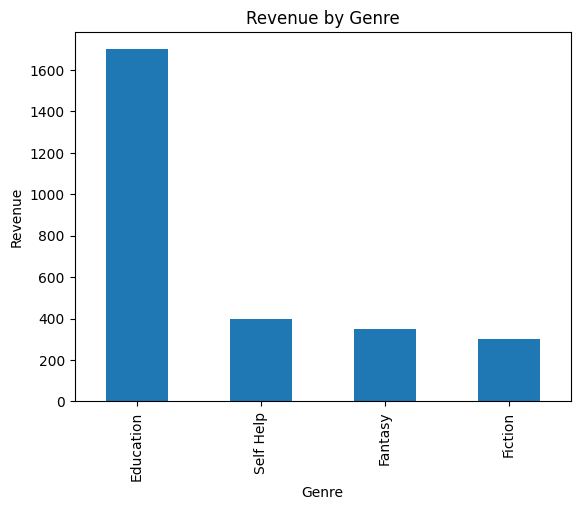

In [11]:
import matplotlib.pyplot as plt

revenue_by_genre.plot(kind="bar")
plt.title("Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Revenue")
plt.show()


In [12]:
top_books = (
    orders_books.groupby("title")["quantity"]
    .sum()
    .sort_values(ascending=False)
)

top_books


title
Data Science 101    2
Atomic Habits       1
Harry Potter        1
Python Basics       1
The Alchemist       1
Name: quantity, dtype: int64

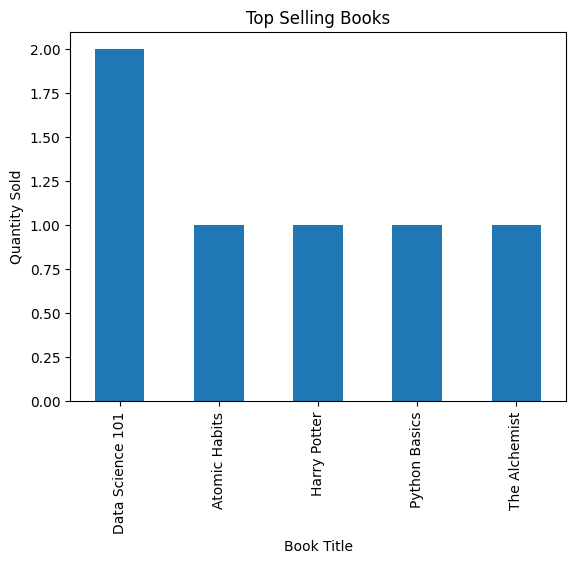

In [13]:
top_books.plot(kind="bar")
plt.title("Top Selling Books")
plt.xlabel("Book Title")
plt.ylabel("Quantity Sold")
plt.show()


In [14]:
orders_per_user = (
    orders_books.groupby("user_id")["order_id"]
    .count()
)

orders_per_user


user_id
101    1
102    1
103    1
104    1
105    1
Name: order_id, dtype: int64

In [15]:
ratings_sales = orders_books.merge(
    ratings, on=["user_id", "book_id"], how="left"
)

ratings_sales[["title", "rating", "quantity", "revenue"]]


,title,rating,quantity,revenue
0,The Alchemist,5,1,299
1,Atomic Habits,4,1,399
2,Data Science 101,5,2,1198
3,Harry Potter,4,1,349
4,Python Basics,5,1,499


In [16]:
avg_rating = ratings_sales.groupby("title")["rating"].mean()
avg_rating


title
Atomic Habits       4.0
Data Science 101    5.0
Harry Potter        4.0
Python Basics       5.0
The Alchemist       5.0
Name: rating, dtype: float64

In [17]:
## Key Insights

- Education and Fiction genres generate the highest revenue
- Certain books consistently sell more units than others
- Users with repeat purchases contribute higher revenue
- Books with higher ratings tend to have better sales performance


SyntaxError: invalid syntax (679225334.py, line 3)